# S04T01: Seleção de características eliminando aquelas que são altamente correlacionadas

## The one with libs

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
path = "/content/drive/My Drive/Arquivos 10 classes/Handcrafted/58_carac/"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## The one who loads the train set 

In [ ]:
def read_pickle(name):
    with (open(name, 'rb')) as openfile:
        while True:
            try:
                one_instance = pickle.load(openfile)
            except EOFError:
                break
    one_instance = np.asanyarray(one_instance)
    return one_instance

In [ ]:
ls "/content/drive/My Drive/Arquivos 10 classes/Handcrafted/58_carac"

handcrafted_features_Tests_.pickle  handcrafted_labels_Tests_.pickle
handcrafted_features_Train_.pickle  handcrafted_labels_Train_.pickle


In [ ]:
x_train = read_pickle(path+'handcrafted_features_Train_.pickle')
x_test = read_pickle(path+'handcrafted_features_Tests_.pickle')

## The one who captures the correlations 

In [ ]:
# Transformar em DataFrame
df_train = pd.DataFrame(x_train)
df_test = pd.DataFrame(x_test)

print("Treino",df_train.shape)
print("Teste",df_test.shape)

# 1. Calcular matrix de correlação
corr_matrix_train = df_train.corr().abs()
corr_matrix_test = df_test.corr().abs()

# 2. Caputar o triângulo superior da matrix 
upper_train = corr_matrix_train.where(np.triu(np.ones(corr_matrix_train.shape), k=1).astype(np.bool))
upper_test = corr_matrix_test.where(np.triu(np.ones(corr_matrix_test.shape), k=1).astype(np.bool))

#print (upper)

# 3. Encontrar os índices das características que possuem uma correlação maior que 0.95 (alta correlação)
to_drop_train = [column for column in upper_train.columns if any(upper_train[column] > 0.91)]
to_drop_test = [column for column in upper_test.columns if any(upper_test[column] > 0.90)]

#Dropando as colunas selecionadas
df_subset_train = df_train.drop(df_train[to_drop_train], axis=1)
df_subset_test = df_test.drop(df_test[to_drop_test], axis=1)

print("Treino",df_subset_train.shape)
print("Teste",df_subset_test.shape)

Treino (15394, 58)
Teste (3756, 58)
Treino (15394, 53)
Teste (3756, 53)


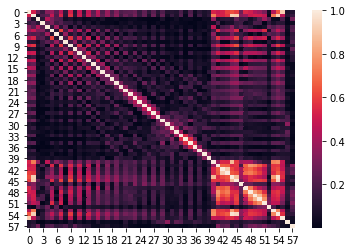

In [ ]:
sns.heatmap(corr_matrix_train)

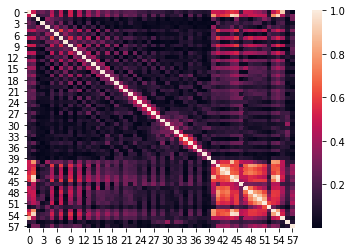

In [ ]:
sns.heatmap(corr_matrix_test)

# Salvamento de Pickles


In [ ]:
path_save_new_hand = "/content/drive/My Drive/Arquivos 10 classes/Handcrafted/New Whit Selected/"

In [ ]:
pickle.dump(df_subset_train, open(path_save_new_hand+'handcrafted_features_treino_no_aumentation_whit_selected.pickle', 'wb'))
pickle.dump(df_subset_test, open(path_save_new_hand+'handcrafted_features_teste_no_aumentation_whit_selected.pickle', 'wb'))

# Mostrandos os dados dos Pickles

In [ ]:
x_train_selected = read_pickle(path_save_new_hand+'handcrafted_features_treino_no_aumentation_whit_selected.pickle')
x_test_selected = read_pickle(path_save_new_hand+'handcrafted_features_teste_no_aumentation_whit_selected.pickle')

## Dados do Teste

In [ ]:
print(x_test_selected.shape)
# for i, data in enumerate(x_test_selected):
#   print(i,data)

(4001, 53)


## Dados do Treino

In [ ]:
print(x_train_selected.shape)

(15709, 53)
